<a href="https://colab.research.google.com/github/victoria-peinado/Arreglo-tarjeta/blob/master/TP_Redes_Neuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clasificación de alumnos

**Ejercicio de Clasificación de Imágenes con Red Neuronal en PyTorch**

Tomando como partida el siguiente notebook, que dispone de un conjunto de imágenes ya recortadas y clasificadas, correspondientes a cada alumno.

**Objetivo:** Crear y entrenar una red neuronal convolucional (CNN) que identifique correctamente al alumno correspondiente a partir de sus imágenes. Evaluar el desempeño del modelo usando diversas métricas y técnicas de visualización. Para esto se deberan apollar del notebook utilizado en clases.

**Información del Dataset:**
- Cada carpeta lleva el nombre del alumno y contiene imágenes del rostro del mismo.
- Las imágenes tienen un tamaño de 224 × 224 píxeles, y al cargarlas se utiliza solamente un canal (escala de grises).
- Las imágenes ya están recortadas a un tamaño uniforme y organizadas adecuadamente para facilitar su carga mediante PyTorch.


# Pasos del Ejercicio:

In [ ]:
import requests
import zipfile
import io
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
from PIL import Image
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import seaborn as sns


## 1. Preparación de los datos



> **Prestar atencion al archivo que descarguen.**



In [ ]:
# URL del ZIP en GitHub hola
# Imagenes turno noche
# url = 'https://github.com/gforconi/UTNIA2025/raw/486178b72dd2ad6b8ebb3c304e3c1669f1a1c00b/TP-Redes%20Neuronales/TNProcesadasCalsificadas.zip'
# Imagenes turno tarde
url = 'https://github.com/gforconi/UTNIA2025/raw/b39824a936e08df1ec3062fc3c63a345f8d1e981/TP-Redes%20Neuronales/TTProcesadasCalsificadas.zip'

# Descargá el ZIP
response = requests.get(url)
if response.status_code == 200:
    with zipfile.ZipFile(io.BytesIO(response.content)) as z:
        z.extractall("data")  # o el path que quieras
    print("Imágenes descargadas y descomprimidas con éxito.")
else:
    print(f"Error al descargar el ZIP: {response.status_code}")


Imágenes descargadas y descomprimidas con éxito.


In [ ]:
# Transforms: Escalado, gris, tensor
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(),
])

path = r'/content/data/ProcesadasCalsificadas'
dataset = datasets.ImageFolder(path, transform=transform)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

classes = dataset.classes

Si observan la carpeta `data/ProcesadasClasificadas` veran que dentro hay una carpeta por alumno. Dentro de cada carpeta estan las imagenes tomadas por sus compañeros.

Dividimos el datsets en Train y Test para el entrenamiento y la validación:

In [ ]:
total_size = len(dataset)
train_size = int(0.8 * total_size)
test_size = total_size - train_size

train_dataset, test_dataset = random_split(dataset, [train_size, test_size], generator=torch.Generator().manual_seed(42))

trainloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
testloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

## 2. Visualización rápida del dataset

In [ ]:
def mostrar_dos_imagenes_por_clase(dataset):
    clases = dataset.classes
    indices_por_clase = {clase: [] for clase in clases}

    # Encontrar los índices de dos imágenes por clase
    for idx, (_, label) in enumerate(dataset.imgs):
        clase = clases[label]
        if len(indices_por_clase[clase]) < 2:
            indices_por_clase[clase].append(idx)
        if all(len(imgs) == 2 for imgs in indices_por_clase.values()):
            break

    fig, axs = plt.subplots(len(clases), 2, figsize=(6, 3 * len(clases)))
    for i, clase in enumerate(clases):
        for j, idx in enumerate(indices_por_clase[clase]):
            imagen, label = dataset[idx]
            if isinstance(imagen, torch.Tensor):
                imagen = imagen.permute(1,2,0)  # Para mostrar imagen de torch (C,H,W) a (H,W,C)
            axs[i, j].imshow(imagen)
            axs[i, j].set_title(f'Clase: {clase}')
            axs[i, j].axis('off')
    plt.tight_layout()
    plt.show()


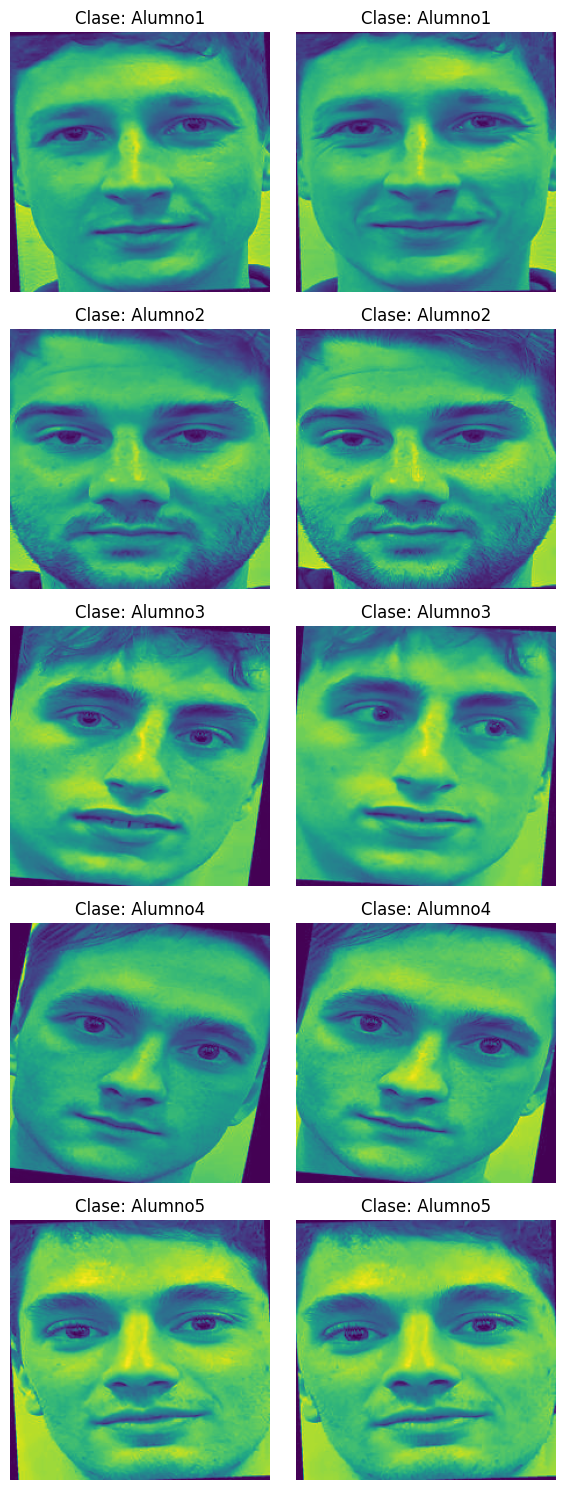

In [ ]:
mostrar_dos_imagenes_por_clase(dataset) # Muestra las imagenes del dataset
# mostrar_dos_imagenes_por_clase(traindataset.dataset) # Muestra las imagenes del conjunto train
# mostrar_dos_imagenes_por_clase(testdataset.dataset) # Muestra las imagenes del conjunto test

## 3. Definición del modelo

Define una arquitectura básica de CNN con capas convolucionales, funciones de activación ReLU, capas de pooling, y capas completamente conectadas.

Decide la cantidad de neuronas y capas según consideres adecuado inicialmente.

Para esta etapa podran ayudarse de la estructura definida en el notebook de clase ([link al notebook](https://https://github.com/gforconi/UTNIA2025/blob/486178b72dd2ad6b8ebb3c304e3c1669f1a1c00b/Clasificador_de_im%C3%A1genes.ipynb))

In [ ]:
class Net(nn.Module):
    def __init__(self, num_classes=5):
        super().__init__()
        break

    def forward(self, x):
        break


# 4. Función de entrenamiento y validación (con registro de métricas)

Escribe funciones que entrenen el modelo durante un número determinado de épocas.

Registra la pérdida (loss) y la precisión (accuracy) tanto para el conjunto de entrenamiento como para el de validación en cada época.

In [ ]:
def train_and_validate(optimizer_name, num_epochs=10):
  break


## 5. Entrenamiento

Realiza el entrenamiento de la CNN usando la función definida.

Experimenta con diferentes valores iniciales de hiperparámetros como la tasa de aprendizaje, número de épocas o batch size según veas la necesidad.

Mencionar todas las opciones evaluadas.

## 6. Gráficas de métricas (Loss y Accuracy)

Genera gráficos que muestren la evolución de la pérdida y precisión durante el entrenamiento y validación.


## 7. Interpretación de las gráficas de entrenamiento y validación

Analiza las gráficas obtenidas. ¿Hay indicios de sobreajuste o subajuste?

¿Qué podrías modificar para mejorar el desempeño del modelo?

## 8. F1-score y Matriz de Confusión

- Calcula el F1-score y genera una matriz de confusión usando el conjunto de prueba.
- Analiza qué alumnos son más difíciles de clasificar.


# **Preguntas finales:**

- ¿Cuál es el alumno con mayor error de clasificación? ¿A qué crees que se debe este error?
- ¿Tuviste que modificar algún hiperparámetro durante el entrenamiento? ¿Cuáles fueron y qué efecto tuvieron?